In [ ]:
#Instaling super gradients and neccesay packages
%%capture
!pip install -q git+https://github.com/Deci-AI/super-gradients.git@stable
!pip install -q super-gradients==3.2.0
!pip install -q roboflow
!pip install -q supervision

In [ ]:
#Supergradients libraries
from super_gradients.training import Trainer
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_val

The console stream is logged into /root/sg_logs/console.log


[2024-01-27 20:14:41] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-27 20:14:46] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-01-27 20:14:49] WARNING - __init__.py - Failed to import pytorch_quantization
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2024-01-27 20:14:54] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-27 20:14:54] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-27 20:14:54] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-01-27 20:14:54] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2024-01-27 20:14:54] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[20

In [ ]:
#Super gradients libraries for model
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [ ]:
#Dataset Just for test
from roboflow import Roboflow

rf_t = Roboflow(api_key="7KzCWCXHCtqFgSyBCoZl")
project_t = rf_t.workspace("laura-munoz").project("test_door_handle_detection")
dataset_t = project_t.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Test_Door_Handle_Detection-2 in yolov5pytorch::   0%|          | 0/312 [00:00<?, ?it/s]

In [ ]:
#files for training model
from typing import List, Dict
class config:
    # Project paths
    DATA_DIR: str = "/content/Door-handle-detection-10"
    CHECKPOINT_DIR: str = "/content/checkpoints"
    EXPERIMENT_NAME: str = "tesis_detection_localization_model_yoloNAS_L"

    # Datasets
    TEST_IMAGES_DIR: str = "/content/Test_Door_Handle_Detection-2/test/images"
    TEST_LABELS_DIR: str = "/content/Test_Door_Handle_Detection-2/test/labels"

    # Classes
    CLASSES: List[str] = ['Door','Handle-Door']
    NUM_CLASSES: int = len(CLASSES)

    # Model
    DATALOADER_PARAMS: Dict = {
      'batch_size': 16,
      'num_workers': 1
    }
    MODEL_NAME: str = 'yolo_nas_l'
    PRETRAINED_WEIGHTS: str = 'coco'

Aquí se carga el modelo que se entreno anteriormente y se hace la seleccion del mejor modelo

In [ ]:
#Selecting best model
from super_gradients.training import models
import os
best_model = models.get(config.MODEL_NAME,
                        num_classes=config.NUM_CLASSES,
                        checkpoint_path=os.path.join(config.CHECKPOINT_DIR, config.EXPERIMENT_NAME, '/content/average_model.pth'))

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [ ]:
#training
trainer = Trainer(experiment_name=config.EXPERIMENT_NAME,
                  ckpt_root_dir=config.CHECKPOINT_DIR)

Se selecciona una imagen random del set de test

In [ ]:
#Selecting a random image from path image
import cv2
import numpy as np
import os
import random

#path to the directory containing images
path_img = ("/content/Test_Door_Handle_Detection-2/test/images/")

#List all images in the directory
file_img = os.listdir(path_img)

#Selecting a random subset of images from the list (file_imgs)
selected_imgs = random.sample(file_img, k=1)

#initialize a list to store the loaded images
images = []

#Loop through the selected image file names, read and convert in RGB color
for img_file in selected_imgs:
  img_path = os.path.join(path_img, img_file) #recreating path file complete name
  img = cv2.imread(img_path)  #Uploading images in cv2 format
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting in RGB color

  if img is not None:
    images.append(img) #Adding image selected in "images" list
  else:
    print(f"Failed to load image: {img_file}")

In [ ]:
#Appliying best model to the random image
outputs = best_model.predict(images)

User provided device_type of 'cuda', but CUDA is not available. Disabling
[2024-01-27 12:07:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


se obtiene la predicción hecha a la imagen random seleccionada, y se observan sus respectivas coordenadas

ImagesDetectionPrediction(_images_prediction_lst=[ImageDetectionPrediction(image=array([[[233, 235, 222],
        [233, 235, 222],
        [233, 235, 222],
        ...,
        [157, 158, 150],
        [157, 158, 150],
        [157, 158, 150]],

       [[233, 235, 222],
        [233, 235, 222],
        [233, 235, 222],
        ...,
        [157, 158, 150],
        [157, 158, 150],
        [157, 158, 150]],

       [[233, 235, 222],
        [233, 235, 222],
        [233, 235, 222],
        ...,
        [157, 158, 150],
        [157, 158, 150],
        [157, 158, 150]],

       ...,

       [[124, 126, 123],
        [123, 125, 122],
        [121, 123, 120],
        ...,
        [ 80,  81,  73],
        [ 80,  81,  73],
        [ 80,  81,  73]],

       [[124, 126, 123],
        [123, 125, 122],
        [121, 123, 120],
        ...,
        [ 75,  76,  68],
        [ 75,  76,  68],
        [ 75,  76,  68]],

       [[124, 126, 123],
        [122, 124, 121],
        [120, 122, 119],
      

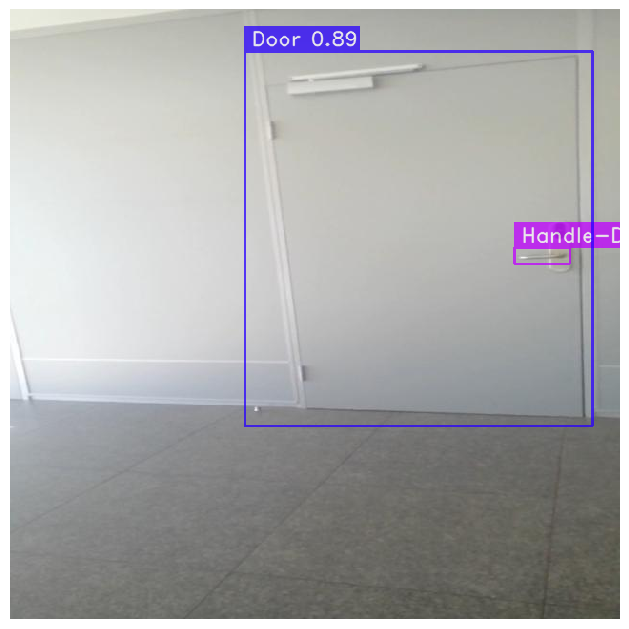

In [ ]:
print(outputs)
outputs.show()

In [ ]:
output_info= print(outputs)

ImagesDetectionPrediction(_images_prediction_lst=[ImageDetectionPrediction(image=array([[[233, 235, 222],
        [233, 235, 222],
        [233, 235, 222],
        ...,
        [157, 158, 150],
        [157, 158, 150],
        [157, 158, 150]],

       [[233, 235, 222],
        [233, 235, 222],
        [233, 235, 222],
        ...,
        [157, 158, 150],
        [157, 158, 150],
        [157, 158, 150]],

       [[233, 235, 222],
        [233, 235, 222],
        [233, 235, 222],
        ...,
        [157, 158, 150],
        [157, 158, 150],
        [157, 158, 150]],

       ...,

       [[124, 126, 123],
        [123, 125, 122],
        [121, 123, 120],
        ...,
        [ 80,  81,  73],
        [ 80,  81,  73],
        [ 80,  81,  73]],

       [[124, 126, 123],
        [123, 125, 122],
        [121, 123, 120],
        ...,
        [ 75,  76,  68],
        [ 75,  76,  68],
        [ 75,  76,  68]],

       [[124, 126, 123],
        [122, 124, 121],
        [120, 122, 119],
      

In [ ]:
# Tomando la información generada por la prediccion realizdad donde se guarda las coordenadas de los bounding box predichos
output_str = str(outputs)

# Buscar la cadena que contiene la información de 'prediction'
prediction_str_start = output_str.find("prediction=")

if prediction_str_start != -1:
    # Encontrar el final de la cadena de 'prediction'
    prediction_str_end = output_str.find(")", prediction_str_start)

    # Extraer la subcadena que contiene la información de 'prediction'
    prediction_info_str = output_str[prediction_str_start:prediction_str_end + 1]

    # Ahora puedes trabajar con la subcadena que contiene la información de 'prediction'
    print(prediction_info_str)
else:
    print("No se encontró la información de 'prediction' en la cadena de texto de 'output'.")


prediction=DetectionPrediction(bboxes_xyxy=array([[246.73242 ,  44.691605, 611.0118  , 437.4508  ],
       [529.7692  , 250.95485 , 587.66473 , 267.86963 ]], dtype=float32)


In [ ]:
output_str = str(outputs)

# Buscar las cadenas que contienen la información de 'prediction' y 'labels'
prediction_str_start = output_str.find("prediction=")
labels_str_start = output_str.find("labels=")

if prediction_str_start != -1 and labels_str_start != -1:
    # Encontrar el final de la cadena de 'prediction'
    prediction_str_end = output_str.find(")", prediction_str_start)
    labels_str_end = output_str.find("]", labels_str_start) + 1  # Asumiendo que labels es una lista

    # Extraer las subcadenas que contienen la información de 'prediction' y 'labels'
    prediction_info_str = output_str[prediction_str_start:prediction_str_end + 1]
    labels_info_str = output_str[labels_str_start:labels_str_end]

    # Ahora puedes trabajar con las subcadenas que contienen la información de 'prediction' y 'labels'
    print("Información de 'prediction':", prediction_info_str)
    print("Información de 'labels':", labels_info_str)
else:
    print("No se encontró la información completa en la cadena de texto de 'output'.")

Información de 'prediction': prediction=DetectionPrediction(bboxes_xyxy=array([[246.73242 ,  44.691605, 611.0118  , 437.4508  ],
       [529.7692  , 250.95485 , 587.66473 , 267.86963 ]], dtype=float32)
Información de 'labels': labels=array([0., 1.]


In [ ]:
prediction_info_str

'bboxes_xyxy=array([[246.73242 ,  44.691605, 611.0118  , 437.4508  ], [529.7692  , 250.95485 , 587.66473 , 267.86963 ]], dtype=float32)'

In [ ]:
labels_info_str

'labels=array([0., 1.])'

In [ ]:
# Usar expresiones regulares para extraer el array de labels
array_labels = re.search(r'array\((.*)\)', labels_info_str).group(1)

# Convertir la cadena de labels en un array de números
labels_array = np.array(eval(array_labels))

# Encontrar la posición donde el valor es '1'
posicion_1 = np.where(labels_array == 1)[0]

# Imprimir la posición
print(posicion_1)

[1]


In [ ]:
# Usar expresiones regulares para encontrar las coordenadas dentro de los corchetes
coordenadas_encontradas = re.findall(r'\[([^\]]*)\]', prediction_info_str)

posicion_1= int(posicion_1)
# Extraer las coordenadas del segundo conjunto (índice 1)
segundo_conjunto = coordenadas_encontradas[posicion_1]

# Convertir la cadena de coordenadas en una lista de números
coordenadas_handledoor = [float(x) for x in segundo_conjunto.split(', ')]

# Imprimir las coordenadas del segundo conjunto
print(coordenadas_handledoor)

[529.7692, 250.95485, 587.66473, 267.86963]


Ahora que ya tengo las coordenadas de la imagen random, debo hacer el print de la imagen con el bounding box predicho del handle por el modelo. Y aplicar el modelo geometrico para que me muestre el punto de agarre. Además de guardar esa coordenada del punto de agarre.

Aquí se comprueba que se sigue teniendo un ligero desajuste en la transformación de la imagen, a pesar de que se esta aplicando la visualización usando las librerias para la prediccion de la imagen usando el modelo. por lo que manual mente por ahora se debe hacer ete ajuste.

Además como solución al lado donde se abre el handle se decidió hacer un input preguntando al usuario hacia donde esta el handle para que luego el modelo pueda calcular e imprimir cual es su punto de agarre.

In [ ]:
side = input("The door handle is in right or left side:")

The door handle is in right or left side:left


Rectangle coordinates: Bbox(x0=529.7692, y0=250.95485, x1=587.66473, y1=267.86963)


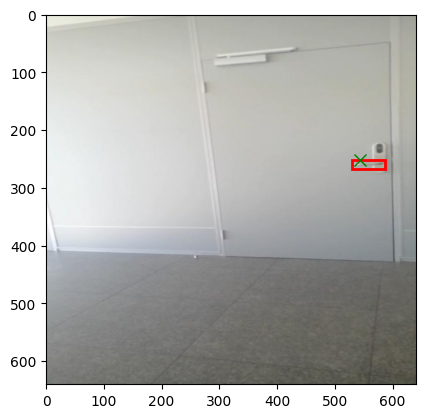

In [ ]:
#######   APPLYING GEOMETRIC MODEL    #######

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D

# Creating figure and axes
fig, ax = plt.subplots(1)

#Converting coords class to plane list (because coords_class is anidated list, it means have twice [[]])
#Coordinates here are in a range 0 to 1
#bbox = [float(value) for value in coords_class[0]]
#print("Bounding box values:", bbox) # botton left corner Coordinate's (x,y), width and height

#Adjusting coordinates to img scale (640 to 640)
img_height, img_width = img.shape[:2] #img's size
#Multiplying bounding box's coordinates X img size for normalize the img and bounding box coordinate
#Se ponen las coordenadas en el mismo sistema de referencia de la imagen
#bbox_scaled = [bbox[0] * img_width, bbox[1] * img_height, bbox[2] * img_width, bbox[3] * img_height]
#bbox_scaled = coordenadas_handledoor
#In the moment, When plot the img, it have a small displacement, so for now I adjust this manually
ajuste_x=0
ajuste_y=0

#Creating the rectangle of the bounding box from scaled bbox_coordinates
#with patches form Matplotlib its created the rectangle using xy bottom left corner and ..
#This rectagles extends from this corner +width and height from lable's file
rect = patches.Rectangle((coordenadas_handledoor[0]-ajuste_x, coordenadas_handledoor[1]-ajuste_y), coordenadas_handledoor[2]-coordenadas_handledoor[0], coordenadas_handledoor[3]-coordenadas_handledoor[1], linewidth=2, edgecolor='r', facecolor='none')
print("Rectangle coordinates:", rect.get_bbox())


#Adding the rectangle to plot
ax.add_patch(rect)

#Saving the bbox coordinates generated for Rectangle function in 'rect_bbox' variable
rect_bbox = np.array(rect.get_bbox()).flatten()
#Extracting splits values of the box (Remeber that this coordinates are bottom left corner), and saving an array for better access
x_min, y_min, x_max, y_max = rect_bbox

#Calculating Bounding box's center coordinates:
x_center = (x_min + x_max)/2
y_center = (y_min + y_max)/2

#Grab point coordinates in the RIGTH size for X axes, because Y axes it stays the same
x_right = (x_center + x_max)/2

#Grip point coordinates in the LEFT size for X axes, because Y axes it stays the same
x_left = (x_min + x_center)/2

#Identigying if handle door is left or rigth
if side == 'right':
  #Adding the grip point to the image in the moment manually
  #Saving grip point coordinates
  grip_point = [x_right, y_center]
  ax.plot(x_right, coordenadas_handledoor[1], marker='x', markersize=8, color='green')
else:
  grip_point = [x_left, y_center]
  ax.plot(x_left, coordenadas_handledoor[1], marker='x', markersize=8, color='green')

#Adjusting axes limits for making match with real image dimensions
ax.set_xlim(0, img_width) #X axes
ax.set_ylim(img_height, 0) #Y axes -Invest y axes for have coherence with image representation

# Showing image
ax.imshow(img)

In [ ]:
coordenadas_handledoor

[529.7692, 250.95485, 587.66473, 267.86963]

In [ ]:
#Gri point coordinates
grip_point

[305.375, 290.5]

AQUI ESTOY TOMANDO LAS IMAGENES SIN EL MODELO

In [ ]:
#Selecting a random image
import cv2
import numpy as np
import os
import random

#path to the directory containing images
path_img = ("/content/Test_Door_Handle_Detection-2/test/images/")

#List all images in the directory
file_img = os.listdir(path_img)

#Selecting a random subset of images from the list (file_imgs)
selected_imgs = random.sample(file_img, k=1)

#initialize a list to store the loaded images
images = []

#Loop through the selected image file names, read and convert in RGB color
for img_file in selected_imgs:
  img_path = os.path.join(path_img, img_file) #recreating path file complete name
  img = cv2.imread(img_path)  #Uploading images in cv2 format
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting in RGB color

  if img is not None:
    images.append(img) #Adding image selected in "images" list
  else:
    print(f"Failed to load image: {img_file}")

In [ ]:
img_path

'/content/Test_Door_Handle_Detection-2/test/images/VID_20200925_103256_mp4-53_jpg.rf.b5bc441de77b6b9e1ed36ac87d1dc9a6.jpg'

In [ ]:
selected_imgs

['VID_20200925_104216_mp4-5_jpg.rf.82932fba0ce741e5938ab971400c07d7.jpg']

In [ ]:
#path to the directory containing labels
path_labels = ("/content/Test_Door_Handle_Detection-2/test/labels/")

#Converting the list to text and eliminating .jpg extension of the name file for a better searching on the list of labels file
selected_img = str(selected_imgs[0]).replace(".jpg",".txt")

file_img_sin_ext = [namefile.replace(".jpg",".txt") for namefile in file_img]

# Creting a dicctionary for mapping images IDs
# Crear un diccionario para mapear IDs de imágenes a rutas de coordenadas
indice_coor = {}

#id_img= os.path.splitext(file_img)[0]  # Obtener el ID eliminando la extensión
path_coor = os.path.join(path_labels, f"{selected_img}")

if os.path.exists(path_coor):
  indice_coor[selected_img]= path_coor
  print(f"path coor exist: {path_coor}")

if selected_img in indice_coor:
  indice_coor[selected_img]
  print(f"The file for the image: {selected_img} is in: {indice_coor}")
else:
    print(f"No found file label for: {selected_img}")


path coor exist: /content/Test_Door_Handle_Detection-2/test/labels/VID_20200925_103256_mp4-42_jpg.rf.fb6bb3a3b88bad295e4b9c08d98049ca.txt
The file for the image: VID_20200925_103256_mp4-42_jpg.rf.fb6bb3a3b88bad295e4b9c08d98049ca.txt is in: {'VID_20200925_103256_mp4-42_jpg.rf.fb6bb3a3b88bad295e4b9c08d98049ca.txt': '/content/Test_Door_Handle_Detection-2/test/labels/VID_20200925_103256_mp4-42_jpg.rf.fb6bb3a3b88bad295e4b9c08d98049ca.txt'}


In [ ]:
indice_coor

{'IMG_20200925_124206_jpg.rf.7640a5671541d5861af8e19aea5890f6.txt': '/content/Test_Door_Handle_Detection-2/test/labels/IMG_20200925_124206_jpg.rf.7640a5671541d5861af8e19aea5890f6.txt'}

In [ ]:
path_coor

'/content/Test_Door_Handle_Detection-2/test/labels/IMG_20200925_124206_jpg.rf.7640a5671541d5861af8e19aea5890f6.txt'

In [ ]:
selected_img

'IMG_20200925_124206_jpg.rf.7640a5671541d5861af8e19aea5890f6.txt'

In [ ]:
selected_imgs

['VID_20200925_103343_mp4-13_jpg.rf.6489a13843f1b7555c362e86dd40fcc8.jpg']

In [ ]:
#Go inside of the labels file selected and taking class 1 (Handle Door) coordinates bounding boxes

coords_class = []

#Open and read label file
with open (path_coor, 'r') as file:
  #Iterate in each line inside of the file
  for line in file:
    #Separating in parts for each space in each line for looking the firts value on the each line
    part= line.split()

  #Validate of the firts value is equal to 1
  if part and part[0] == '1':
    coords_class.append(part[1:])

print("Coordinates of class Handle door are: ")

for coords in coords_class:
  print(coords)


Coordinates of class Handle door are: 
['0.89453125', '0.5078125', '0.11875', '0.01796875']


In [ ]:
coords_class

[['0.89453125', '0.5078125', '0.11875', '0.01796875']]

In [ ]:
part

['1', '0.59765625', '0.65234375', '0.28359375', '0.0625']

Valores del bounding box: [0.89453125, 0.5078125, 0.11875, 0.01796875]
Coordenadas del rectángulo: Bbox(x0=0.89453125, y0=0.5078125, x1=1.01328125, y1=0.52578125)


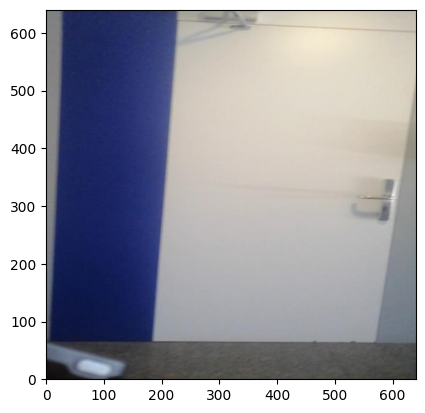

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from matplotlib.transforms import Affine2D

# Creating fig
fig, ax= plt.subplots(1)

# Showing random image
#ax.imshow(img_normalized)

#Converting coords class to plane list (because coords_class is a anidade list, it means have twice [[]])

bbox= [float (value) for value in coords_class[0]]
print("Valores del bounding box:", bbox)

#Adjust coordinates for get the same image frame
img_height, img_width = img.shape[:2]
bbox_scaled = [bbox[0] * img_width, bbox[1] * img_height, bbox[2] * img_width, bbox[3] * img_height]

#Adding bounding box for this specific random image
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
print("Coordenadas del rectángulo:", rect.get_bbox())
ax.add_patch(rect)

# Configurar límites de ejes para que coincidan con las dimensiones reales de la imagen
ax.set_xlim(0, img_width)
ax.set_ylim(img_height, 0)  # Invertir el eje y para que sea coherente con la representación de la imagen



# Mostrar la imagen
ax.imshow(img, extent=[0, img_width, 0, img_height])

ax.set_xlim(0, img_width)
ax.set_ylim(0, img_height)

#ax.imshow(img, extent=[0, img_width, 0, img_height])

#Showing image with bounding box
plt.show()


In [ ]:
print("Dimensiones de la imagen:", img.shape[:2])

Dimensiones de la imagen: (640, 640)


In [ ]:
bbox

[0.65859375, 0.41328125, 0.06328125, 0.01171875]

Valores del bounding box: [0.89453125, 0.5078125, 0.11875, 0.01796875]
Coordenadas del rectángulo: Bbox(x0=572.5, y0=320.0, x1=648.5, y1=331.5)


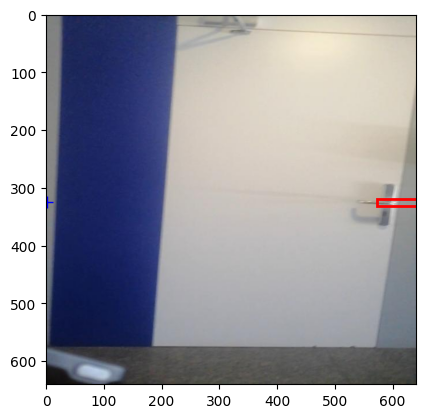

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D

# Crear una figura y ejes
fig, ax = plt.subplots(1)

# Converting coords class to plane list (because coords_class is anidated list, it means have twice [[]])
bbox = [float(value) for value in coords_class[0]]
print("Valores del bounding box:", bbox)


# Ajustar las coordenadas según la escala de la imagen
img_height, img_width = img.shape[:2]
bbox_scaled = [bbox[0] * img_width, bbox[1] * img_height, bbox[2] * img_width, bbox[3] * img_height]
#bbox_scaled = [bbox[0] * img_width, img_height - bbox[1] * img_height, bbox[2] * img_width, img_height - bbox[3] * img_height]

ajuste_x=0
ajuste_y=0 #5

# Crear el rectángulo
rect = patches.Rectangle((bbox_scaled[0]-ajuste_x, bbox_scaled[1]-ajuste_y), bbox_scaled[2], bbox_scaled[3], linewidth=2, edgecolor='r', facecolor='none')
print("Coordenadas del rectángulo:", rect.get_bbox())


# Agregar el rectángulo al gráfico
ax.add_patch(rect)

#Formula para obtener la coor en X del punto de agarre, solo en X porque en y no cambia, ya que en Y es la coordenada del centro solo se mueve en X
#This formula works when handle door is on the rigth size
#x_final_r = (((bbox[0]+ (442/640))/2)*640)-ajuste_x

#This formula works when handle door is on the left size
#x_final_l = ((bbox[0]/2)*640)-ajuste_x

x_final_l = 1 #bbox_scaled[0] +ajuste_x
#Adding the grip point to the image
ax.plot(x_final_l, bbox_scaled[1], marker='+', markersize=8, color='b')

# Configurar límites de ejes para que coincidan con las dimensiones reales de la imagen
ax.set_xlim(0, img_width)
#ax.set_ylim(0, img_height)
# Configurar límites de ejes para que coincidan con las dimensiones reales de la imagen
#ax.set_xlim(0, img_width)
ax.set_ylim(img_height, 0)  # Invertir el eje y para que sea coherente con la representación de la imagen

# Mostrar la imagen
ax.imshow(img)

# Mostrar la imagen con el bounding box
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

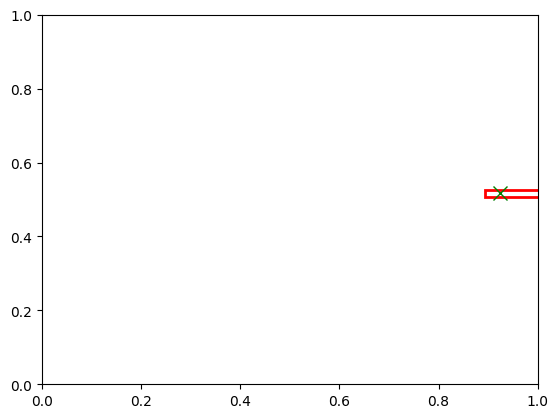

In [ ]:
# Coordenadas del rectángulo
rect_coords = [0.89453125, 0.5078125, 0.11875, 0.01796875]

#coordenadas esqiona superior derecha
x_sd= 1.01328125
y_sd= 0.52578125
#Coordenadas del centro del bounding box
x_center = (rect_coords[0] + x_sd)/2
y_center = (rect_coords[1] + y_sd)/2

#Coordenadas punto de agarre a la derecha
x_pa_D = (x_center + x_sd)/2

#coordenadas punto de agarre a la izquierda
x_pa_I = (rect_coords[0] + x_center)/2

x1= rect_coords[0]
y1= rect_coords[1]

fig, ax = plt.subplots()

rect = plt.Rectangle((rect_coords[0], rect_coords[1] ), rect_coords[2], rect_coords[3], fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

ax.plot(x_pa_I, y_center, marker='x', markersize=10, color='green')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show

Cargando la imagen random con su respectivo Bounding box con las coordenadas del bounding box normalizadas a la imagen (640x640). recordar que las coordenadas que trae el rchivo labels de yolo son las coordenadas de la esquina infereior izquierda, el ancho y el largo y apartir de ahí se calcularan las del centro del bounding box y de ahí se calcularan las del punto de agarre

Bounding box values: [0.89453125, 0.5078125, 0.11875, 0.01796875]
Rectangle coordinates: Bbox(x0=544.5, y0=320.0, x1=620.5, y1=331.5)


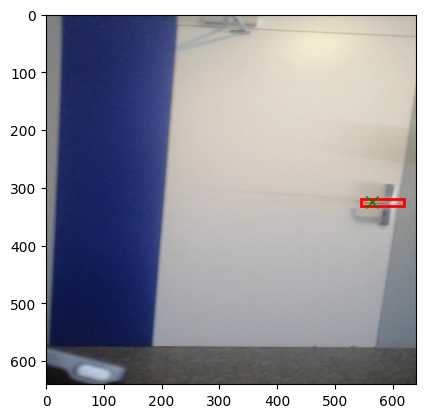

In [ ]:
#######   APPLYING GEOMETRIC MODEL    #######

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D

# Creating figure and axes
fig, ax = plt.subplots(1)

#Converting coords class to plane list (because coords_class is anidated list, it means have twice [[]])
#Coordinates here are in a range 0 to 1
bbox = [float(value) for value in coords_class[0]]
print("Bounding box values:", bbox) # botton left corner Coordinate's (x,y), width and height

#Adjusting coordinates to img scale (640 to 640)
img_height, img_width = img.shape[:2] #img's size
#Multiplying bounding box's coordinates X img size for normalize the img and bounding box coordinate
#Se ponen las coordenadas en el mismo sistema de referencia de la imagen
bbox_scaled = [bbox[0] * img_width, bbox[1] * img_height, bbox[2] * img_width, bbox[3] * img_height]

#In the moment, When plot the img, it have a small displacement, so for now I adjust this manually
ajuste_x=28
ajuste_y=5

#Creating the rectangle of the bounding box from scaled bbox_coordinates
#with patches form Matplotlib its created the rectangle using xy bottom left corner and ..
#This rectagles extends from this corner +width and height from lable's file
rect = patches.Rectangle((bbox_scaled[0]-ajuste_x, bbox_scaled[1]-ajuste_y), bbox_scaled[2], bbox_scaled[3], linewidth=2, edgecolor='r', facecolor='none')
print("Rectangle coordinates:", rect.get_bbox())

#Adding the rectangle to plot
ax.add_patch(rect)

#Saving the bbox coordinates generated for Rectangle function in 'rect_bbox' variable
rect_bbox = np.array(rect.get_bbox()).flatten()
#Extracting splits values of the box (Remeber that this coordinates are bottom left corner), and saving an array for better access
x_min, y_min, x_max, y_max = rect_bbox

#Calculating Bounding box's center coordinates:
x_center = (x_min + x_max)/2
y_center = (y_min + y_max)/2

#Grab point coordinates in the RIGTH size for X axes, because Y axes it stays the same
x_rigth = (x_center + x_max)/2

#Grab point coordinates in the LEFT size for X axes, because Y axes it stays the same
x_left = (x_min + x_center)/2

#Adding the grip point to the image in the moment manually
ax.plot(x_left, bbox_scaled[1], marker='x', markersize=8, color='green')

#Adjusting axes limits for making match with real image dimensions
ax.set_xlim(0, img_width) #X axes
ax.set_ylim(img_height, 0) #Y axes -Invest y axes for have coherence with image representation

# Showing image
ax.imshow(img)

probando cargar la imagen random para mostrar la imagen con el bounding box y el punto de agarre (DE OTRA MANERA)

In [ ]:
import torch
from pathlib import Path
from torchvision import transforms
from PIL import Image